In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

from fannypack import utils

from lib import dpf, panda_baseline_models, panda_datasets, panda_baseline_training

print(torch.__version__, np.__version__)

1.3.1 1.15.4


In [31]:
# Experiment configuration
experiment_name = "baseline_vision_only"
dataset_args = {
    'use_proprioception': False,
    'use_haptics': False,
    'use_vision': True,
    'vision_interval': 2,
}

In [32]:
# Create model & training buddy
model = panda_baseline_models.PandaBaselineModel(use_prev_state=True, units=32)
buddy = utils.Buddy(experiment_name, model, log_dir="logs/baseline", checkpoint_dir="checkpoints/baseline")

Using device: cuda
Loaded checkpoint from path: checkpoints/baseline/baseline_vision_only-0000000000003120.ckpt


In [33]:
# Load dataset
trainset = panda_datasets.PandaDynamicsDataset(
    "data/pushset_medium.hdf5",
    **dataset_args
)

Parsed data: 38533 active, 1367 inactive
Keeping: 1367


In [34]:
# trainset_loader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
# for i in range(5):
#     print("Training epoch", i)
#     panda_baseline_training.train(buddy, model, trainset_loader, log_interval=100, state_noise_std=0.2)

# trainset_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
# for i in range(5):
#     print("Training epoch", i)
#     panda_baseline_training.train(buddy, model, trainset_loader, log_interval=100, state_noise_std=0.1)

trainset_loader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)
for i in range(20):
    print("Training epoch", i)
    panda_baseline_training.train(buddy, model, trainset_loader, log_interval=100, state_noise_std=0.1)

Training epoch 0


KeyboardInterrupt: 

# Model eval

In [27]:
eval_trajectories = panda_datasets.load_trajectories(
    "data/pushset_small.hdf5",
    **dataset_args
)

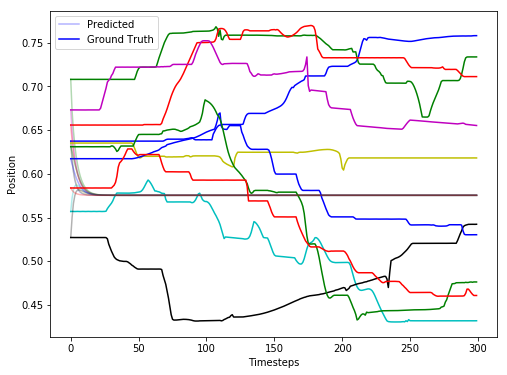

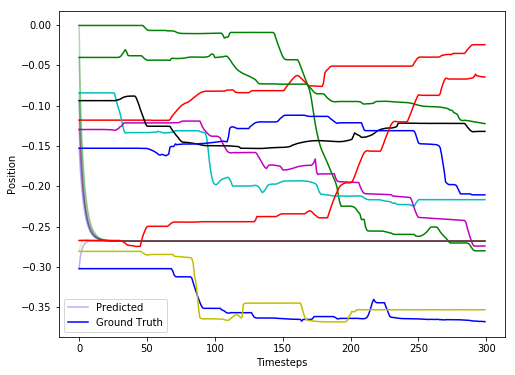

X RMSE:  0.10532021
Y RMSE:  0.13740787


In [28]:
pred, actual = panda_baseline_training.rollout(model, eval_trajectories)
panda_baseline_training.eval_rollout(pred, actual, plot=True)

In [29]:
buddy.save_checkpoint()

Saved checkpoint to path: checkpoints/baseline/baseline_vision_only-0000000000003120.ckpt
